In [1]:
# need alluvian plot
# !wget https://raw.githubusercontent.com/vinsburg/alluvial_diagram/master/alluvial.py

--2025-02-18 11:19:43--  https://raw.githubusercontent.com/vinsburg/alluvial_diagram/master/alluvial.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12728 (12K) [text/plain]
Saving to: ‘alluvial.py’

alluvial.py         100%[===================>]  12.43K  --.-KB/s    in 0s      

2025-02-18 11:19:43 (39.4 MB/s) - ‘alluvial.py’ saved [12728/12728]



In [ ]:
import numpy as np 
import pandas as pd 

from scipy.stats import pearsonr


import matplotlib.pyplot as plt
import alluvial

/home/maria/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# define functions

def get_fdrs(pvals_no_cis,pvals_no_trans,title='',visualize = True):
    ''' Correct raw p-values by Benjamini-Hochberg. Plot raw and corrected significance values if visualize is true.'''

    num_test = len(pvals_no_cis)

    sorted_index_cis = np.argsort(np.argsort(pvals_no_cis))
    sorted_index_trans = np.argsort(np.argsort(pvals_no_trans))
    fdr_no_cis = (np.arange(1,num_test+1)/num_test * sorted(pvals_no_cis))[sorted_index_cis]
    fdr_no_trans = (np.arange(1,num_test+1)/num_test * sorted(pvals_no_trans))[sorted_index_trans]

    if visualize:
        fs = 20
        fig,ax = plt.subplots(1,2,figsize=(10,5))

        ax[0].hist(pvals_no_trans,density=False,bins = 45)
        ax[0].set_title(title+'\nNull = NO $trans$',fontsize=fs)
        ax[0].set_xlabel('Uncorrected p-values',fontsize=fs)
        ax[0].set_ylabel('Number of genes',fontsize=fs)
        ax[0].grid()

        ax[1].hist(pvals_no_cis,bins = 45,density=False)
        ax[1].set_title(title+'\nNull = NO $cis$',fontsize=fs)
        ax[1].set_xlabel('Uncorrected p-values',fontsize=fs)
        ax[1].set_ylabel('Number of genes',fontsize=fs)
        ax[1].grid()

        plt.tight_layout()
        plt.show();

        fig,ax = plt.subplots(1,2,figsize=(10,5))

        ax[0].hist(fdr_no_trans,density=False,bins = 45,color='darkred')
        ax[0].set_title('Model C\nNull = NO $trans$',fontsize=fs)
        ax[0].set_xlabel('False discovery rates (FDRs)',fontsize=fs)
        ax[0].set_ylabel('Number of genes',fontsize=fs)
        ax[0].grid()

        ax[1].hist(fdr_no_cis,bins = 45,density=False,color='darkred')
        ax[1].set_title('Model_C\nNull = NO $cis$',fontsize=fs)
        ax[1].set_xlabel('False discovery rates (FDRs)',fontsize=fs)
        ax[1].set_ylabel('Number of genes',fontsize=fs)
        ax[1].grid()

        plt.tight_layout()
        plt.show();
    
    return(fdr_no_cis,fdr_no_trans)

def plot_weight_distributions(coefficients_C,
                              title='',
                              color = 'salmon',
                              bins=100):
    
    fs = 15
    s = 10
    beta_C = coefficients_C['V1'].values
    beta_c2_C = coefficients_C['V2'].values
    beta_t1_C = coefficients_C['V3'].values
    beta_t2_C = coefficients_C['V4'].values

    fig, ax = plt.subplots(1, 4, figsize=(14, 3))


    # Plot histograms with color and grid
    ax[0].hist(beta_C, bins=bins, color=color, alpha=0.7)
    ax[1].hist(beta_c2_C, bins=bins, color=color, alpha=0.7)
    ax[2].hist(beta_t1_C, bins=bins, color=color, alpha=0.7)
    ax[3].hist(beta_t2_C, bins=bins, color=color, alpha=0.7)

    # Set titles with enhanced font
    titles = ['$\\beta$', '$\\beta_{C2}$', '$\\beta_{T1}$', '$\\beta_{T2}$']
    for i, title_ in enumerate(titles):
        ax[i].set_title(title_, fontsize=fs, fontweight='bold', color='black')
        ax[i].grid(True, linestyle='--', alpha=0.5)
        ax[i].minorticks_on()
        ax[i].tick_params(axis='both', which='major', labelsize=fs-3)

    # Set x-limits and improve layout
    # ax[2].set_xlim(-2, 2)
    # ax[3].set_xlim(-2, 2)
    plt.tight_layout(pad=2)
    plt.suptitle(title,fontsize=fs+2, fontweight='bold', color='black')

    # Show plot
    plt.show();

    # and plot them against each other
    fig, ax = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

    ax[0, 0].scatter(beta_C, beta_c2_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[0, 1].scatter(beta_C, beta_t1_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[0, 2].scatter(beta_C, beta_t2_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[1, 0].scatter(beta_c2_C, beta_t1_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[1, 1].scatter(beta_c2_C, beta_t2_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[1, 2].scatter(beta_t1_C, beta_t2_C, s=s, color=color, alpha=0.7, edgecolor='black')

    # Set axis labels with font size
    ax[0, 0].set_xlabel('$\\beta_{C}$', fontsize=fs)
    ax[0, 0].set_ylabel('$\\beta_{C2}$', fontsize=fs)
    ax[0, 1].set_xlabel('$\\beta_{C}$', fontsize=fs)
    ax[0, 1].set_ylabel('$\\beta_{T1}$', fontsize=fs)
    ax[0, 2].set_xlabel('$\\beta_{C}$', fontsize=fs)
    ax[0, 2].set_ylabel('$\\beta_{T2}$', fontsize=fs)
    ax[1, 0].set_xlabel('$\\beta_{C2}$', fontsize=fs)
    ax[1, 0].set_ylabel('$\\beta_{T1}$', fontsize=fs)
    ax[1, 1].set_xlabel('$\\beta_{C2}$', fontsize=fs)
    ax[1, 1].set_ylabel('$\\beta_{T2}$', fontsize=fs)
    ax[1, 2].set_xlabel('$\\beta_{T1}$', fontsize=fs)
    ax[1, 2].set_ylabel('$\\beta_{T2}$', fontsize=fs)

    # Add gridlines, central lines, and minor ticks
    for i in range(2):
        for j in range(3):
            ax[i, j].axvline(0, color='black', linestyle='--', linewidth=0.8)
            ax[i, j].axhline(0, color='black', linestyle='--', linewidth=0.8)
            ax[i, j].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
            ax[i, j].minorticks_on()
            ax[i, j].tick_params(axis='both', which='major', labelsize=fs-3)

    # # Set a consistent x and y axis limit across subplots if appropriate
    # for axis in ax.flat:
    #     axis.set_xlim(-4, 4)
    #     axis.set_ylim(-4, 4)

    # Add a main title
    plt.suptitle(title, fontsize=fs+2, fontweight='bold')

    plt.show();


def get_r2(fitted_values,actual_values,title='',color='salmon',
           bins=100,visualize=True):
    
    fs = 20
    r2_C = np.zeros(len(actual_values))

    for i in range(len(r2_C)):
        fitted_values_i= fitted_values.iloc[i,:].values
        actual_values_i = actual_values.iloc[i,:].values    
        r2_C[i],_ = pearsonr(actual_values_i,fitted_values_i)

    if visualize:
        plt.hist(r2_C,bins=bins,color=color)
        plt.title(title, fontsize=fs, fontweight='bold', color='black')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlabel('Pearson $R^2$ values',fontsize=fs)
        plt.ylabel('Number of genes',fontsize=fs)

    return(r2_C)


def make_triplot(coefficients,
                 fdr_no_cis,
                 fdr_no_trans,
                 genes,
                 title):

    # use models to calculate values for parental and hybrid alleles
    cell_size = 10000
    X_standard = np.array([[1,0,1,0],
                           [1,1,0,1],
                           [1,0,1,1],
                           [1,1,1,1]])
    
    num_test = len(coefficients)

    pred_counts = np.array(  [np.sum(coefficients.iloc[i,:].values*X_standard,axis=1) + np.log(cell_size) for i in range(num_test)]  )
    pred_counts = np.exp(pred_counts)


    # create data frame for genes

    df_model = pd.DataFrame({
        'gene' : genes,
        'P1' : pred_counts[:,0],
        'P2' : pred_counts[:,1],
        'H1' : pred_counts[:,2],
        'H2' : pred_counts[:,3],
        'Parlog2FC' : np.log2(pred_counts[:,0]/pred_counts[:,1]),
        'Hyblog2FC' : np.log2(pred_counts[:,2]/pred_counts[:,3]),
    })
    
    df_model = df_model.set_index('gene')

    colors_2 = np.array(['lightgray']*num_test)

    P = df_model['Parlog2FC'].values.flatten()
    H = df_model['Hyblog2FC'].values.flatten()
    delta = P - H

    cis_index = (fdr_no_cis<0.05)&(fdr_no_trans>0.05)
    trans_index = (fdr_no_cis>0.05)&(fdr_no_trans<0.05)
    amb_index = (fdr_no_cis>0.05)&(fdr_no_trans>0.05)

    cis_plus_trans_index = (fdr_no_cis<0.05)&(fdr_no_trans<0.05)& (((delta > 0) & (H > 0)) | ( (delta < 0) & (H < 0)))
    cis_x_trans_index = (fdr_no_cis<0.05)&(fdr_no_trans<0.05)&(((delta <= 0) & (H >= 0)) | ( (delta >= 0) & (H <= 0))) 

    colors_2[cis_index] = 'orangered'
    colors_2[trans_index] = 'royalblue'                                                                   
    colors_2[cis_plus_trans_index] = 'skyblue'                                                                   
    colors_2[cis_x_trans_index] = 'green'                                                                                                                                              
    df_model['colors'] = colors_2                                                                                        
                                                                                    
    reg_assignments = np.array(['conserved']*num_test)
    reg_assignments[cis_index] = 'cis'
    reg_assignments[trans_index] = 'trans'                                                                   
    reg_assignments[cis_plus_trans_index] = 'cis+trans'                                                                   
    reg_assignments[cis_x_trans_index] = 'cisxtrans'   
    df_model['reg_assignment'] = reg_assignments                                                                               



    # random order
    df = df_model
    fig, ax = plt.subplots(3, 1, figsize=(6, 23*(3/4)))

    s = 2
    alpha = 1.0
    axis_fs = 25
    title_fs = 18
    label_fs = 20
    line_color = 'black'
    axis_width = 3.0
    line_alpha = 0.7
    fs = 20

    P = df['Parlog2FC'].values.flatten()
    H = df['Hyblog2FC'].values.flatten()
    delta = P - H
    theta_scaled = (2/np.pi) * np.arctan(H / delta)
    R = np.sqrt(delta**2 + H**2)

    df_model['R'] = R
    df_model['theta_scaled'] = theta_scaled


    cis_prop_reordered = theta_scaled-0.5
    cis_prop_reordered[cis_prop_reordered<=-1.0] = (cis_prop_reordered[cis_prop_reordered<=-1.0]) + 2.0
    df_model['cis_prop_reordered'] = cis_prop_reordered
    colors = df['colors'].values

    num_per_reg_group_B = [sum(colors=='green'),
                        sum(colors=='skyblue'),
                        sum(colors=='royalblue'),
                        sum(colors=='orangered'),
                        sum(colors_2=='lightgray')] 

    random_idx = np.arange(0,len(colors))
    np.random.shuffle(random_idx)


    ax[0].scatter(P[random_idx],H[random_idx],s = s, alpha = alpha, c = colors[random_idx])
    ax[0].set_xlabel('$R_{P}$ (log2 parental fold change)', fontsize = axis_fs)
    ax[0].set_ylabel('$R_{H}$ (log2 hybrid fold change)', fontsize = axis_fs)

    ax[1].scatter(P[random_idx]-H[random_idx],H[random_idx],s=s,alpha=alpha,  c = colors[random_idx])
    ax[1].set_xlabel('$R_{P} - R_{H}$',fontsize = axis_fs)
    ax[1].set_ylabel('$R_{H}$',fontsize = axis_fs)

    ax[2].scatter(cis_prop_reordered[random_idx], P[random_idx] ,s = s, alpha = alpha, c =colors[random_idx])
    # ax[2].set_xlabel(r'$\frac{2}{\pi} \theta$ (scaled angle from $trans$ axis)',fontsize=axis_fs)
    ax[2].set_ylabel('$R_{P}$',fontsize=axis_fs)

    for i in range(2):
        ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=axis_fs)
        ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=axis_fs)
        ax[i].tick_params(axis='both', labelsize=label_fs)
        ax[i].grid(which='both', alpha=0.5, linewidth=0.5)
        ax[i].minorticks_on()


    # Determine the diagonal points for the line y = x
    x_min, x_max = ax[i].get_xlim()
    y_min, y_max = ax[i].get_ylim()
    diag_val = max( np.abs(x_min), np.abs(x_max), np.abs(y_min), np.abs(y_max) )
    # ax[i].plot([-diag_val, diag_val], np.sqrt(3)*np.array([-diag_val, diag_val]), color='black',alpha=0.7,linestyle='--')
    # ax[i].plot([-diag_val, diag_val], np.sqrt(3)*np.array([diag_val, -diag_val]), color='black',alpha=0.7,linestyle='--')
    # ax[i].plot([-diag_val, diag_val], (1/np.sqrt(3))*np.array([-diag_val, diag_val]), color='black',alpha=0.7,linestyle='--')
    # ax[i].plot([-diag_val, diag_val], (1/np.sqrt(3))*np.array([diag_val, -diag_val]), color='black',alpha=0.7,linestyle='--')


    x = np.linspace(-diag_val, diag_val, 100) 
    ax_ = ax[0]
    ax_.plot(x, x, color='orangered', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.axhline(0, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.plot(x+x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.plot(-x-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    # ax_.axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')
    ax_.axvline(0, color='black', linewidth=2, alpha=0.7, linestyle='-',zorder=0)
    ax_.set_xlim(-diag_val, diag_val)
    ax_.set_ylim(-diag_val, diag_val)

    ax_ = ax[1]
    ax_.axvline(0, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axhline(0, color='darkblue', linewidth=axis_width, alpha = line_alpha,zorder=0)
    ax_.plot(x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.plot(-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.set_xlim(-diag_val, diag_val)
    ax_.set_ylim(-diag_val, diag_val)

    # Set additional grid lines for the third plot
    ax_ = ax[2]
    ax_.axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
    ax_.axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

    ax[2].tick_params(axis='both', labelsize=label_fs)
    ax[2].tick_params(bottom=False)
    ax[2].grid(which='both', alpha=0.5, linewidth=0.5)
    ax[2].minorticks_on()



    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    ax[0].set_title(title,fontsize=fs,fontweight='bold')
    plt.show();


    return(df_model)


def make_triplot_horizontal(coefficients, fdr_no_cis, fdr_no_trans, genes, title):
    # use models to calculate values for parental and hybrid alleles
    cell_size = 10000
    X_standard = np.array([[1,0,1,0], [1,1,0,1], [1,0,1,1], [1,1,1,1]])
    num_test = len(coefficients)

    pred_counts = np.array([np.sum(coefficients.iloc[i,:].values*X_standard, axis=1) + np.log(cell_size) for i in range(num_test)])
    pred_counts = np.exp(pred_counts)

    df_model = pd.DataFrame({
        'gene': genes,
        'P1': pred_counts[:,0],
        'P2': pred_counts[:,1],
        'H1': pred_counts[:,2],
        'H2': pred_counts[:,3],
        'Parlog2FC': np.log2(pred_counts[:,0] / pred_counts[:,1]),
        'Hyblog2FC': np.log2(pred_counts[:,2] / pred_counts[:,3]),
    })
    df_model = df_model.set_index('gene')

    colors_2 = np.array(['lightgray'] * num_test)

    P = df_model['Parlog2FC'].values.flatten()
    H = df_model['Hyblog2FC'].values.flatten()
    delta = P - H

    cis_index = (fdr_no_cis < 0.05) & (fdr_no_trans > 0.05)
    trans_index = (fdr_no_cis > 0.05) & (fdr_no_trans < 0.05)
    amb_index = (fdr_no_cis > 0.05) & (fdr_no_trans > 0.05)
    cis_plus_trans_index = (fdr_no_cis < 0.05) & (fdr_no_trans < 0.05) & (((delta > 0) & (H > 0)) | ((delta < 0) & (H < 0)))
    cis_x_trans_index = (fdr_no_cis < 0.05) & (fdr_no_trans < 0.05) & (((delta <= 0) & (H >= 0)) | ((delta >= 0) & (H <= 0)))

    colors_2[cis_index] = 'orangered'
    colors_2[trans_index] = 'royalblue'
    colors_2[cis_plus_trans_index] = 'skyblue'
    colors_2[cis_x_trans_index] = 'green'
    df_model['colors'] = colors_2

    reg_assignments = np.array(['conserved'] * num_test)
    reg_assignments[cis_index] = 'cis'
    reg_assignments[trans_index] = 'trans'
    reg_assignments[cis_plus_trans_index] = 'cis+trans'
    reg_assignments[cis_x_trans_index] = 'cisxtrans'
    df_model['reg_assignment'] = reg_assignments

    df = df_model
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Horizontal layout (1 row, 3 columns)

    s = 2
    alpha = 1.0
    axis_fs = 25
    label_fs = 20
    line_color = 'black'
    axis_width = 3.0
    line_alpha = 0.7
    fs = 20

    P = df['Parlog2FC'].values.flatten()
    H = df['Hyblog2FC'].values.flatten()
    delta = P - H
    theta_scaled = (2 / np.pi) * np.arctan(H / delta)
    R = np.sqrt(delta ** 2 + H ** 2)

    df_model['R'] = R
    df_model['theta_scaled'] = theta_scaled

    cis_prop_reordered = theta_scaled - 0.5
    cis_prop_reordered[cis_prop_reordered <= -1.0] += 2.0
    df_model['cis_prop_reordered'] = cis_prop_reordered

    colors = df['colors'].values

    random_idx = np.arange(0, len(colors))
    np.random.shuffle(random_idx)

    ax[0].scatter(P[random_idx], H[random_idx], s=s, alpha=alpha, c=colors[random_idx])
    ax[0].set_xlabel('$R_{P}$ (log2 parental fold change)', fontsize=axis_fs)
    ax[0].set_ylabel('$R_{H}$ (log2 hybrid fold change)', fontsize=axis_fs)

    ax[1].scatter(P[random_idx] - H[random_idx], H[random_idx], s=s, alpha=alpha, c=colors[random_idx])
    ax[1].set_xlabel('$R_{P} - R_{H}$', fontsize=axis_fs)
    ax[1].set_ylabel('$R_{H}$', fontsize=axis_fs)

    ax[2].scatter(cis_prop_reordered[random_idx], P[random_idx], s=s, alpha=alpha, c=colors[random_idx])
    ax[2].set_ylabel('$R_{P}$', fontsize=axis_fs)

    for i in range(3):
        ax[i].tick_params(axis='both', labelsize=label_fs)
        ax[i].grid(which='both', alpha=0.5, linewidth=0.5)
        ax[i].minorticks_on()

    x_min, x_max = ax[i].get_xlim()
    y_min, y_max = ax[i].get_ylim()
    diag_val = max(np.abs(x_min), np.abs(x_max), np.abs(y_min), np.abs(y_max))

    x = np.linspace(-diag_val, diag_val, 100)
    ax[0].plot(x, x, color='orangered', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[0].axhline(0, color='darkblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[0].plot(x+x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[0].axvline(0, color='black', linewidth=2, alpha=0.7, linestyle='-', zorder=0)
    ax[0].plot(-x-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[0].set_xlim(-diag_val, diag_val)
    ax[0].set_ylim(-diag_val, diag_val)

    ax[1].axvline(0, color='orangered', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[1].axhline(0, color='darkblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[1].plot(x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[1].plot(-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[1].set_xlim(-diag_val, diag_val)
    ax[1].set_ylim(-diag_val, diag_val)

    ax[2].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    ax[0].set_title(title, fontsize=fs, fontweight='bold')
    plt.show()

    return df_model




def plot_reg_bar(reg_assignments,title):
    
    # number per category
    reg_groups = ['cis x trans','cis + trans','trans', 'cis', 'conserved']
    bar_colors = ['green','skyblue','royalblue','orangered','lightgray']
    
    num_per_reg_group = [ np.sum(reg_assignments=='cisxtrans'),
                          np.sum(reg_assignments=='cis+trans'),
                          np.sum(reg_assignments=='trans'),
                          np.sum(reg_assignments=='cis'),
                          np.sum(reg_assignments=='conserved') ]
    
    # barplot

    fig, ax = plt.subplots(1,1,figsize = (8,6) )

    axis_fs = 20
    title_fs = 20
    bars = ax.bar(range(len(num_per_reg_group)), num_per_reg_group, color=bar_colors)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
                ha='center', va='bottom', fontsize=25)

    ax.set_xticks(range(len(num_per_reg_group)))
    ax.set_xticklabels(reg_groups,fontsize=axis_fs-4,rotation=45,ha='right')
    ax.set_xlabel('Assigned regulation group',fontsize=axis_fs)
    ax.set_ylabel('Number of genes',fontsize= axis_fs)
    ax.set_yscale('log')
    ax.yaxis.grid(which='both', alpha=0.5, linewidth=0.5)
    ax.minorticks_on()
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.set_title(title,fontsize=title_fs)

    plt.show();




def plot_alluvian(df1,df2,title,column,reg_groups,alluvial_colors,
                  plot_log=False,s1=2,s2=8):

    num_overlap_dict = {r : {} for r in reg_groups}
    log_num_overlap_dict = {r : {} for r in reg_groups}

    for r1 in reg_groups:
        their_indices = df1[df1[column] == r1].index.values.flatten()
        for r2 in reg_groups:
            our_indices = df2[df2[column] == r2 ].index.values.flatten()
            num_overlap = len(set(their_indices).intersection(set(our_indices)))
            num_overlap_dict[r1][r2+' * '] = num_overlap
            if num_overlap!= 0:
                log_num_overlap_dict[r1][r2+' * '] = np.log(num_overlap)
            else:
                log_num_overlap_dict[r1][r2+' * '] = 0


    # alluvial_colors = ['skyblue','orangered','forestgreen','royalblue','lightgray']
    if plot_log:
        ax = alluvial.plot(log_num_overlap_dict,colors=alluvial_colors,alpha = 0.9)
    else:
        ax = alluvial.plot(num_overlap_dict,colors=alluvial_colors,alpha = 0.9)
    fig = ax.get_figure()
    fig.set_size_inches(s1,s2)
    plt.title(title,fontsize=20,fontweight='bold')
    plt.show();

def plot_alluvian2(df1, df2, title, column, reg_groups, alluvial_colors, plot_log=False, s1 = 2, s2 = 8):
    num_overlap_dict = {r: {} for r in reg_groups}
    log_num_overlap_dict = {r: {} for r in reg_groups}

    # Calculate overlap counts and log-transformed counts
    for r1 in reg_groups:
        their_indices = df1[df1[column] == r1].index.values.flatten()
        for r2 in reg_groups:
            our_indices = df2[df2[column] == r2].index.values.flatten()
            num_overlap = len(set(their_indices).intersection(set(our_indices)))
            num_overlap_dict[r1][r2 + ' * '] = num_overlap
            log_num_overlap_dict[r1][r2 + ' * '] = np.log(num_overlap) if num_overlap != 0 else 0

    # Calculate total counts for each category on both sides
    left_totals = {r1: sum(overlaps.values()) for r1, overlaps in num_overlap_dict.items()}
    right_totals = {r2 + ' * ': sum(num_overlap_dict[r1][r2 + ' * '] for r1 in reg_groups) for r2 in reg_groups}

    # Add totals to the labels in num_overlap_dict and log_num_overlap_dict
    for r1 in reg_groups:
        left_label = f"{r1} ({left_totals[r1]})"
        num_overlap_dict[left_label] = num_overlap_dict.pop(r1)
        log_num_overlap_dict[left_label] = log_num_overlap_dict.pop(r1)
    
    for r2 in reg_groups:
        right_label = f"{r2} * ({right_totals[r2 + ' * ']})"
        for label_dict in [num_overlap_dict, log_num_overlap_dict]:
            for left_key in label_dict.keys():
                label_dict[left_key][right_label] = label_dict[left_key].pop(r2 + ' * ')

    # Plotting
    if plot_log:
        ax = alluvial.plot(log_num_overlap_dict, colors=alluvial_colors, alpha=0.9)
    else:
        ax = alluvial.plot(num_overlap_dict, colors=alluvial_colors, alpha=0.9)

    fig = ax.get_figure()
    fig.set_size_inches(s1, s2)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.show()


In [4]:
# gene names
gene_names_raw1 = pd.read_csv("../data/ballinger/gProfiler_gene_names_1.csv")
gene_names_raw = pd.read_csv("../data/ballinger/gProfiler_gene_names.csv")
# concatenate
gene_names_df = pd.concat((gene_names_raw1,gene_names_raw)).sort_values(by='name',ascending=True)
gene_names = gene_names_df.name.values
gene_ids = gene_names_df.initial_alias.values

# Male, BAT, Cold results

In [5]:
results_path = '../results/ballinger/male_BAT_cold_'
title_bat_cold = 'Male, BAT, Cold'

pval_name = 'pvals'
pvals_no_cis_bat_cold = pd.read_csv(f'{results_path}edgeR_{pval_name}_no_cis.csv').iloc[:,0].values
pvals_no_trans_bat_cold = pd.read_csv(f'{results_path}edgeR_{pval_name}_no_trans.csv').iloc[:,0].values
fitted_values_bat_cold = pd.read_csv(f'{results_path}edgeR_fitted_vals.csv')
coefficients_bat_cold = pd.read_csv(f'{results_path}edgeR_coefficients.csv')

actual_values_bat_cold = pd.read_csv('../data/ballinger/male_BAT_cold_X.txt',delimiter='\t',header=None).T

# assigned categories 
assigned_bat_cold = pd.read_csv('../data/ballinger/BAT.MALE.COLD.categories.forplot.txt',sep=' ')
assigned_bat_cold = assigned_bat_cold.set_index( 'Unnamed: 0' )
genes_bat_cold = np.sort(assigned_bat_cold.index.values)
assigned_bat_cold = assigned_bat_cold.loc[ genes_bat_cold, :]




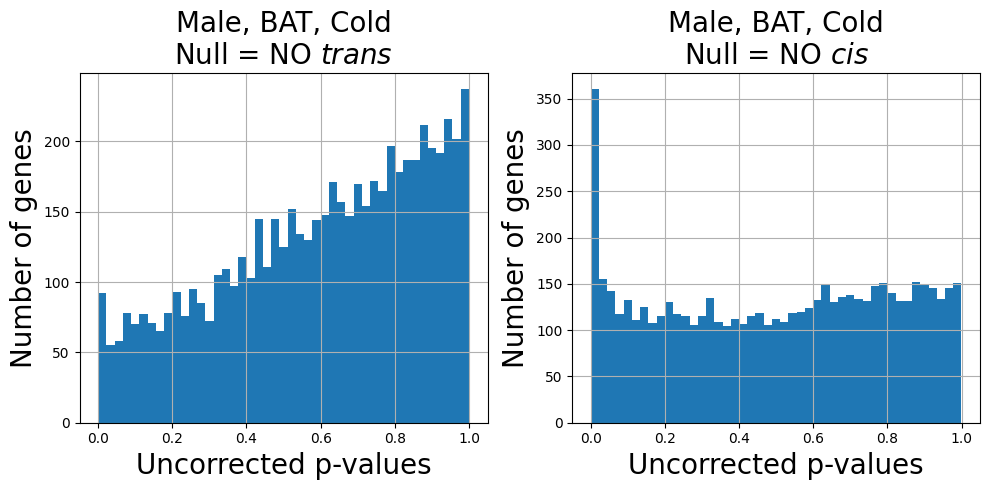

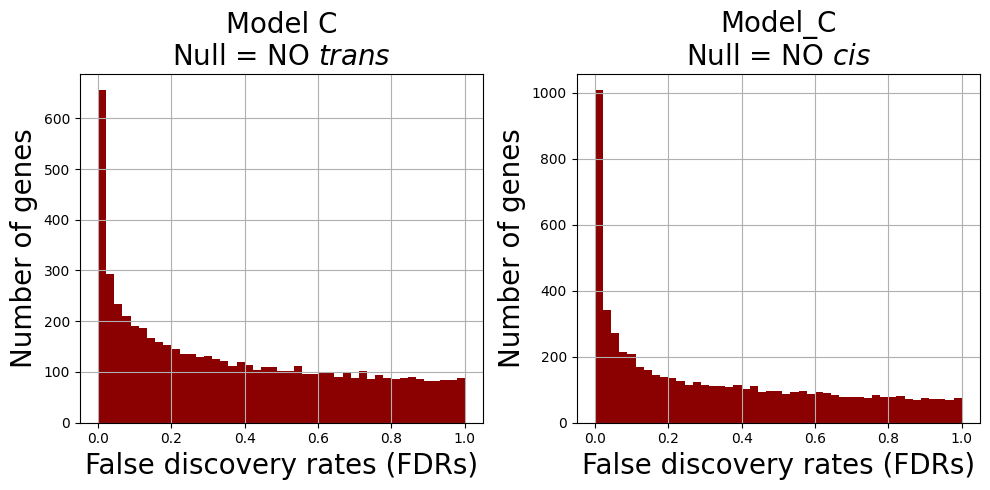

In [6]:
# histogram of pvalues and FDRs
fdr_no_cis_bat_cold, fdr_no_trans_bat_cold = get_fdrs(pvals_no_cis_bat_cold,
                                                      pvals_no_trans_bat_cold,
                                                      title=title_bat_cold,visualize = True)

In [ ]:
# histogram and scatter plots of learned weights
# plot_weight_distributions(coefficients_bat_cold,
#                               title=title_bat_cold,
#                               color = 'salmon',
#                               bins=100)

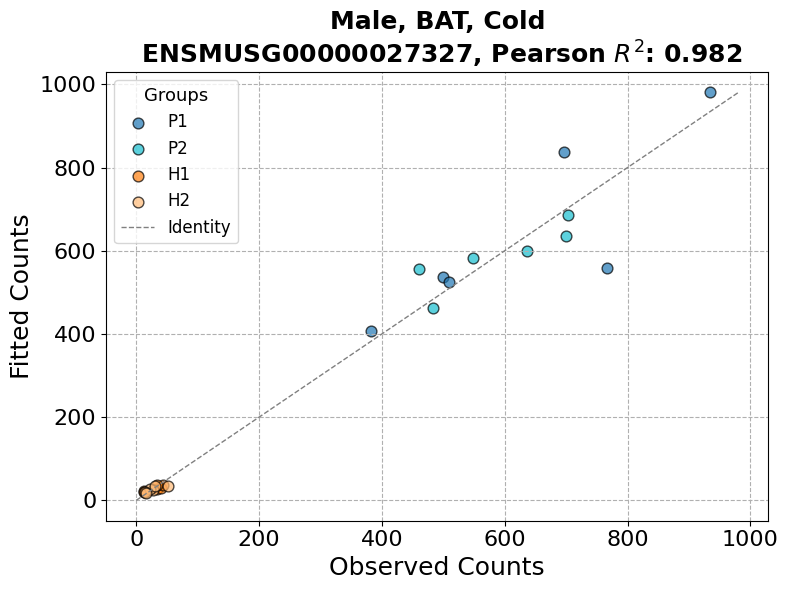

In [8]:
colors =  ['#1f77b4', '#17becf', '#ff7f0e', '#ffbb78'] # Colors for P1, P2, H1, and H2

# Create scatter plot
i = 204
observed_counts = actual_values_bat_cold.iloc[i, :].values
fitted_counts = fitted_values_bat_cold.iloc[i, :].values
gene = gene_ids[i]

plt.figure(figsize=(8, 6))
plt.scatter(observed_counts[:6], fitted_counts[:6], color=colors[0], label='P1', s=60, edgecolor='black', alpha=0.7)
plt.scatter(observed_counts[6:12], fitted_counts[6:12], color=colors[1], label='P2', s=60, edgecolor='black', alpha=0.7)
plt.scatter(observed_counts[12:18], fitted_counts[12:18], color=colors[2], label='H1', s=60, edgecolor='black', alpha=0.7)
plt.scatter(observed_counts[18:], fitted_counts[18:], color=colors[3], label='H2', s=60, edgecolor='black', alpha=0.7)

# Increase tick label sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add a 1:1 line for ideal fit comparison
max_count = max(max(observed_counts), max(fitted_counts))
plt.plot([0, max_count], [0, max_count], color='gray', linestyle='--', linewidth=1, label='Identity')

# Set labels and title with larger font sizes
plt.xlabel('Observed Counts', fontsize=18)
plt.ylabel('Fitted Counts', fontsize=18)
r_,_ = pearsonr(fitted_counts,observed_counts)
plt.title(title_bat_cold+f'\n {gene}, Pearson $R^2$: {r_:.3f}', fontsize=18, fontweight='bold')

# Add a legend with increased font size
plt.legend(title='Groups', fontsize=12, title_fontsize=13, loc='upper left')

# Show plot
plt.tight_layout()
plt.grid(linestyle='--')
plt.show()


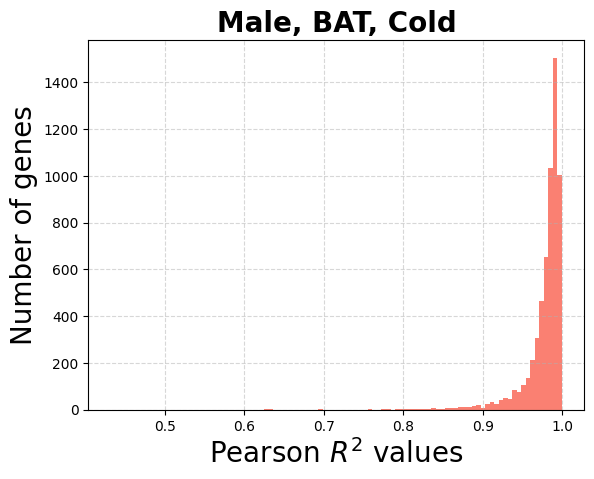

In [9]:
r2_bat_cold = get_r2(actual_values=actual_values_bat_cold,
                     fitted_values=fitted_values_bat_cold,
                     title=title_bat_cold,
                     color='salmon')

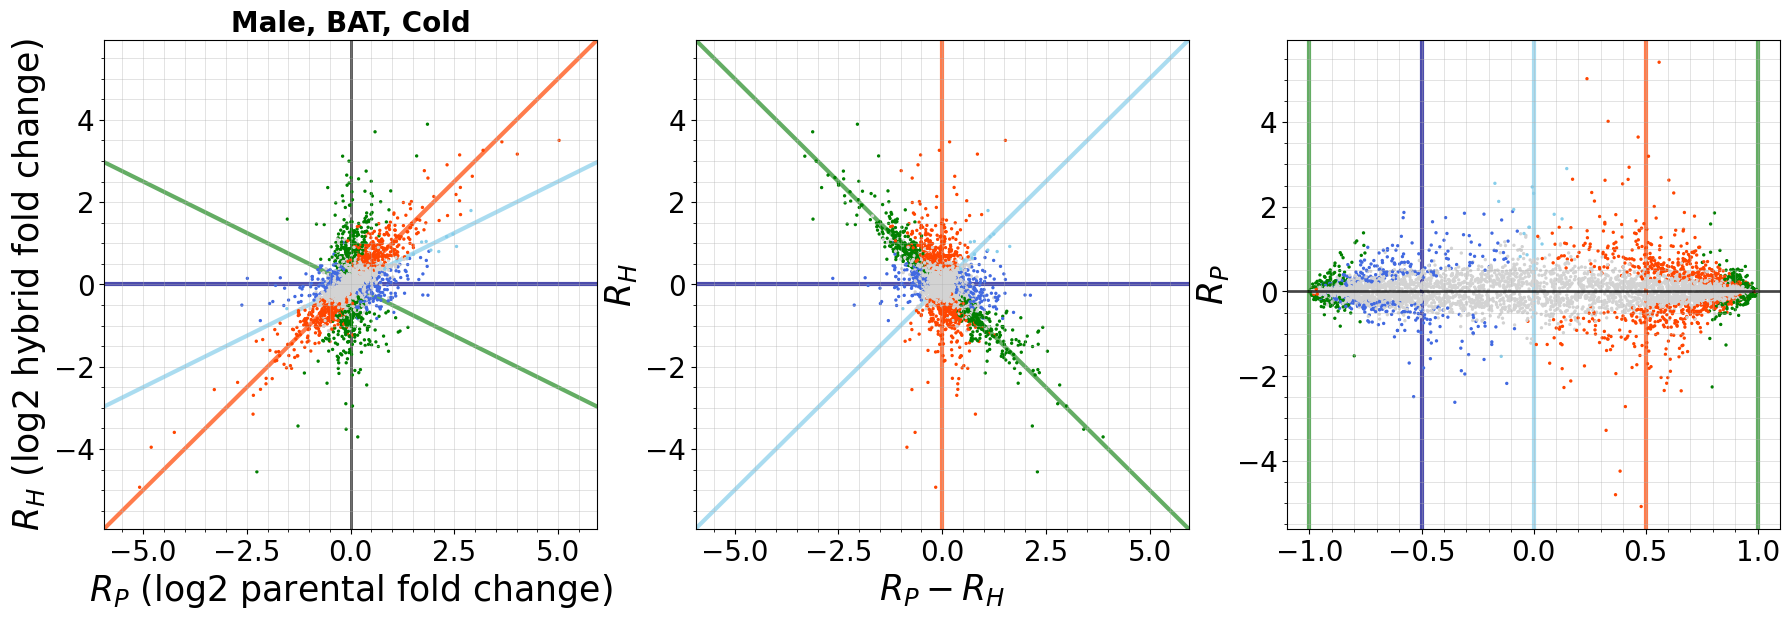

In [10]:
df_bat_cold = make_triplot_horizontal(coefficients=coefficients_bat_cold,
                 fdr_no_cis=fdr_no_cis_bat_cold,
                 fdr_no_trans=fdr_no_trans_bat_cold,
                 genes=genes_bat_cold,
                 title=title_bat_cold)

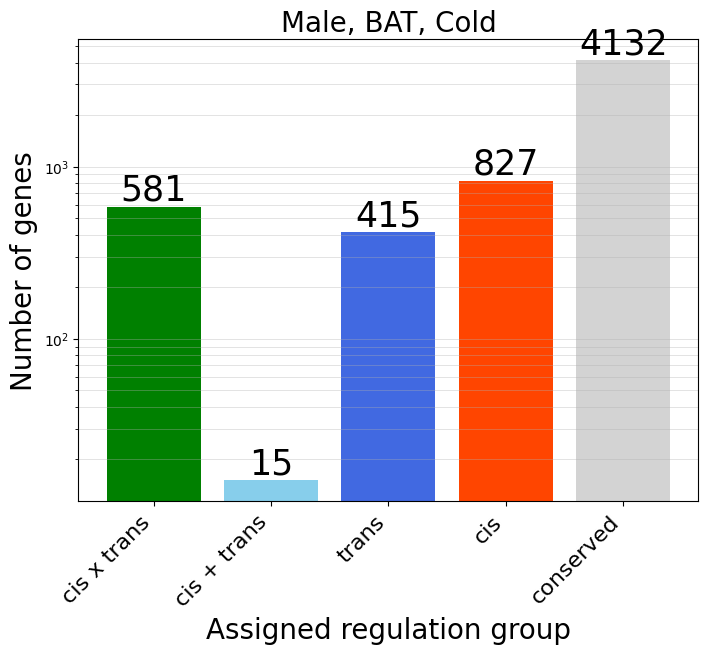

In [11]:
# number per category
plot_reg_bar(reg_assignments=df_bat_cold['reg_assignment'].values,
             title=title_bat_cold)

/tmp/ipykernel_1796560/1862078399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_1796560/1862078399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_1796560/1862078399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

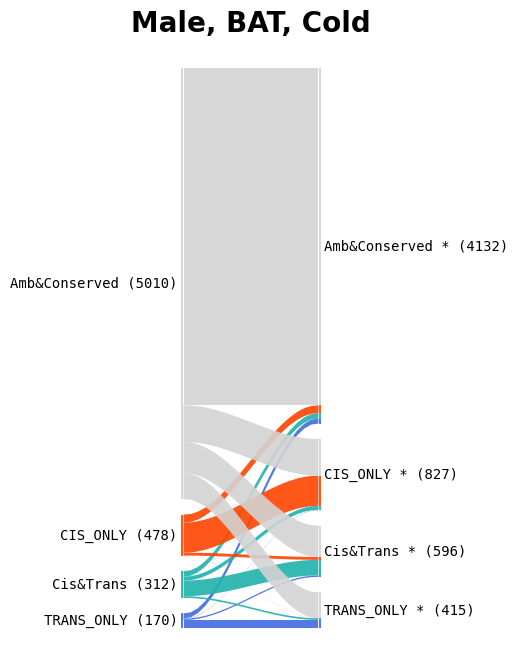

In [12]:
# alluvial plot
assigned_bat_cold['Reg_to_compare']=assigned_bat_cold['Amb&Conserved'].values
df_bat_cold['Reg_to_compare'] = df_bat_cold['reg_assignment'].values
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

# filter
filt = (df_bat_cold.reg_assignment.values=='conserved')&(assigned_bat_cold.Reg_to_compare.values=='Amb&Conserved')
df_bat_cold_filtered = df_bat_cold[~filt]
assigned_bat_cold_filtered = assigned_bat_cold[~filt]

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_bat_cold,
               df2=df_bat_cold,
               title=title_bat_cold,
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False,
              );

In [13]:
same = sum(assigned_bat_cold.Reg_to_compare.values==df_bat_cold.Reg_to_compare.values) / len(assigned_bat_cold.Reg_to_compare.values)
1- same, same

(0.238358458961474, 0.761641541038526)

# Male, BAT, Warm results

In [13]:
results_path = '../results/ballinger/male_BAT_warm_'
title_bat_warm = 'Male, BAT, Warm'



pvals_no_cis_bat_warm = pd.read_csv(f'{results_path}edgeR_pvals_no_cis.csv').iloc[:,0].values
pvals_no_trans_bat_warm = pd.read_csv(f'{results_path}edgeR_pvals_no_trans.csv').iloc[:,0].values
fitted_values_bat_warm = pd.read_csv(f'{results_path}edgeR_fitted_vals.csv')
coefficients_bat_warm = pd.read_csv(f'{results_path}edgeR_coefficients.csv')

actual_values_bat_warm = pd.read_csv('../data/ballinger/male_BAT_warm_X.txt',delimiter='\t',header=None).T

# assigned categories 
assigned_bat_warm = pd.read_csv('../data/ballinger/BAT.MALE.WARM.categories.forplot.txt',sep=' ')
assigned_bat_warm = assigned_bat_warm.set_index( 'Unnamed: 0' )
genes_bat_warm = np.sort(assigned_bat_warm.index.values)
assigned_bat_warm = assigned_bat_warm.loc[ genes_bat_warm, :]




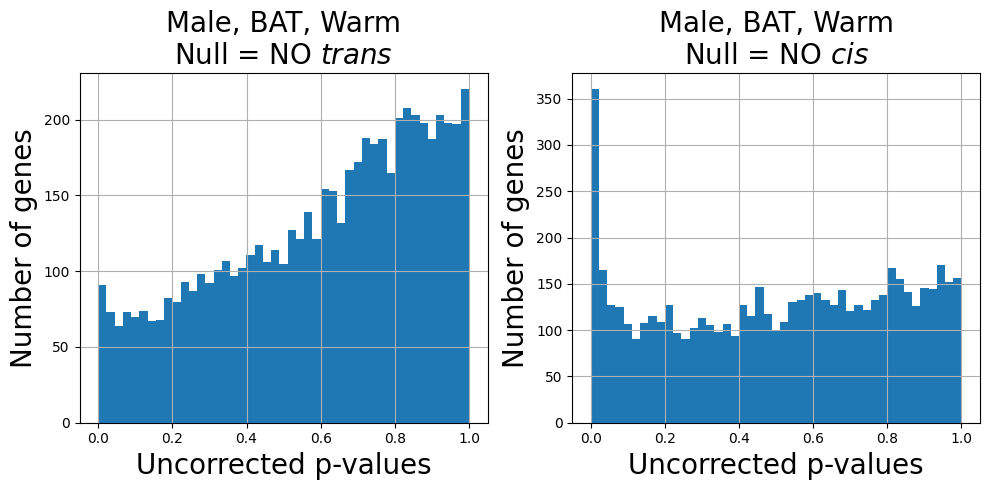

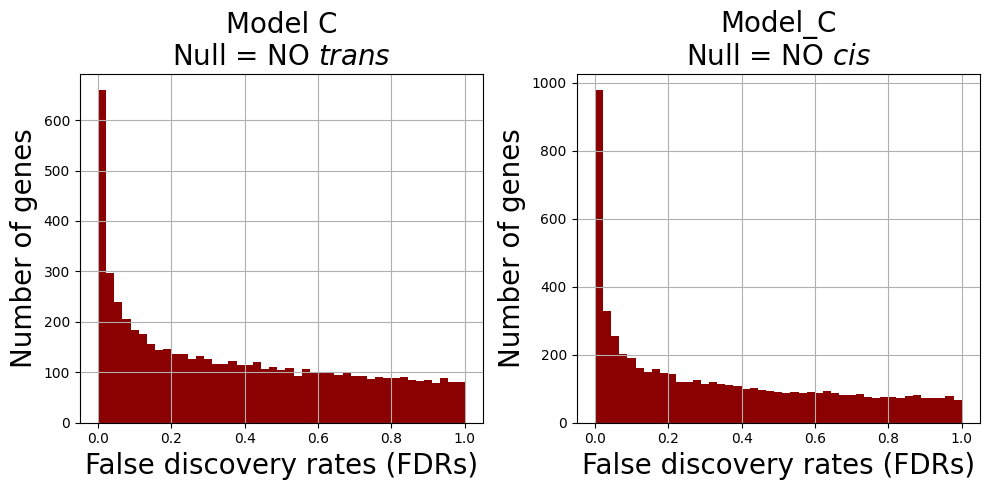

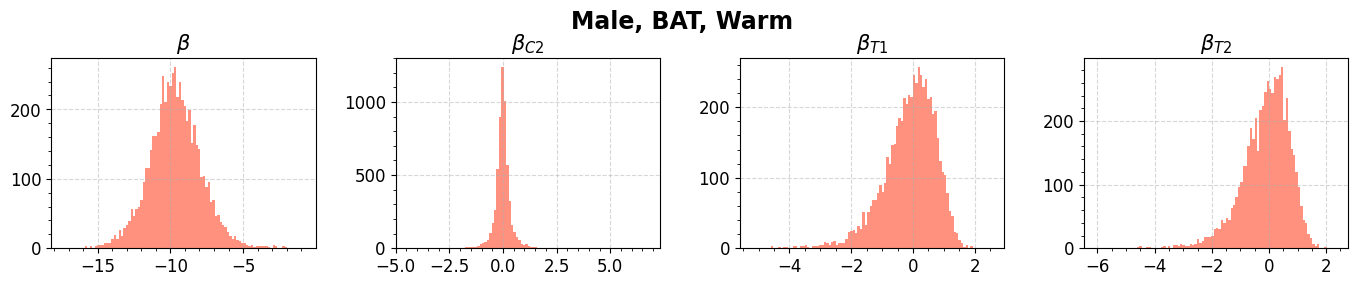

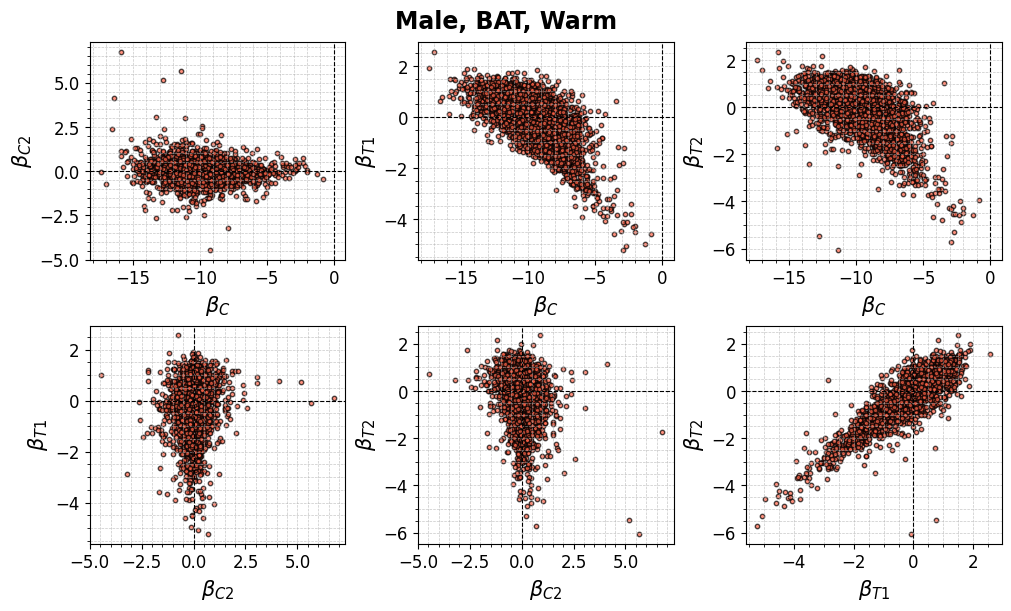

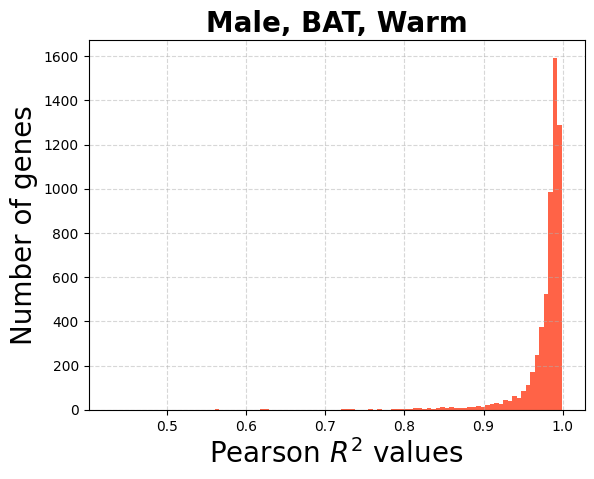

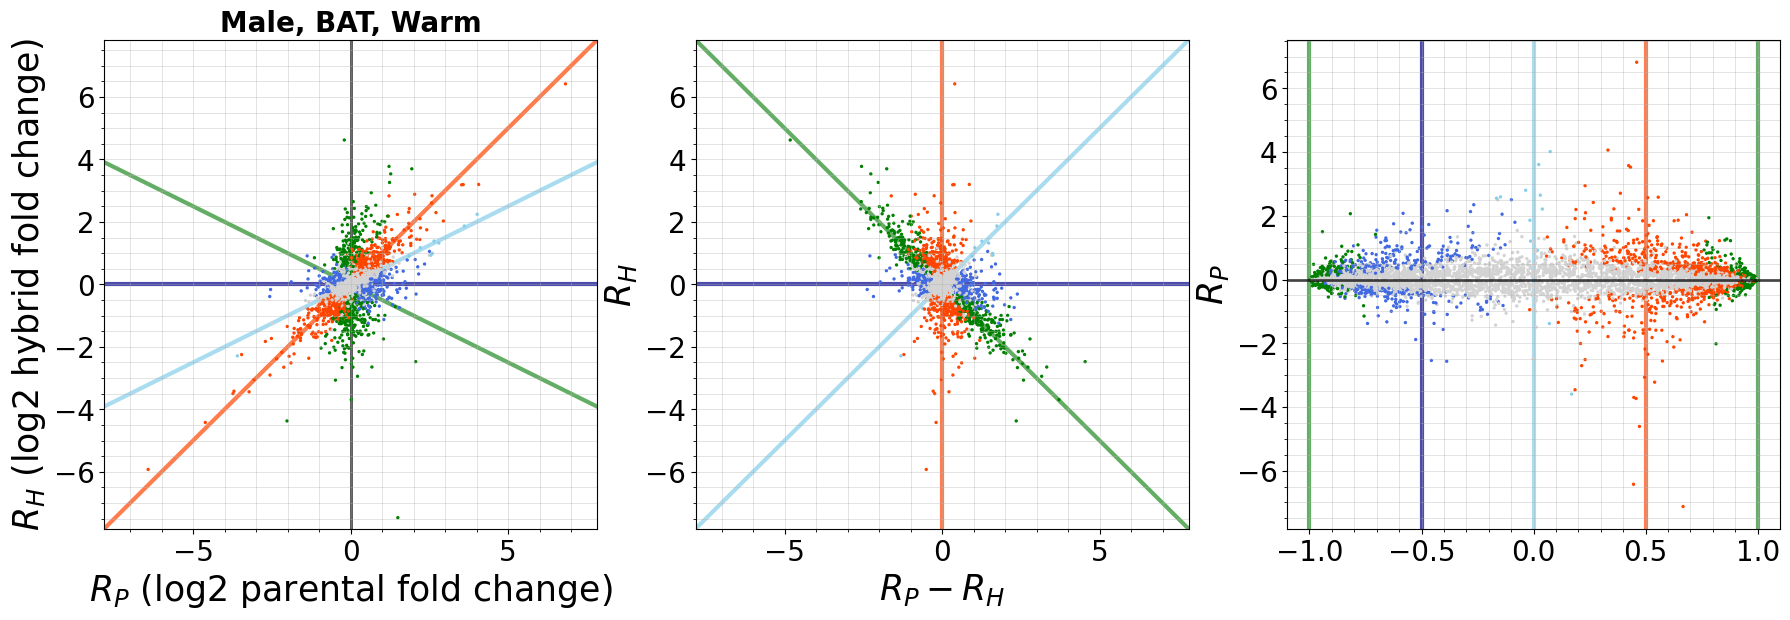

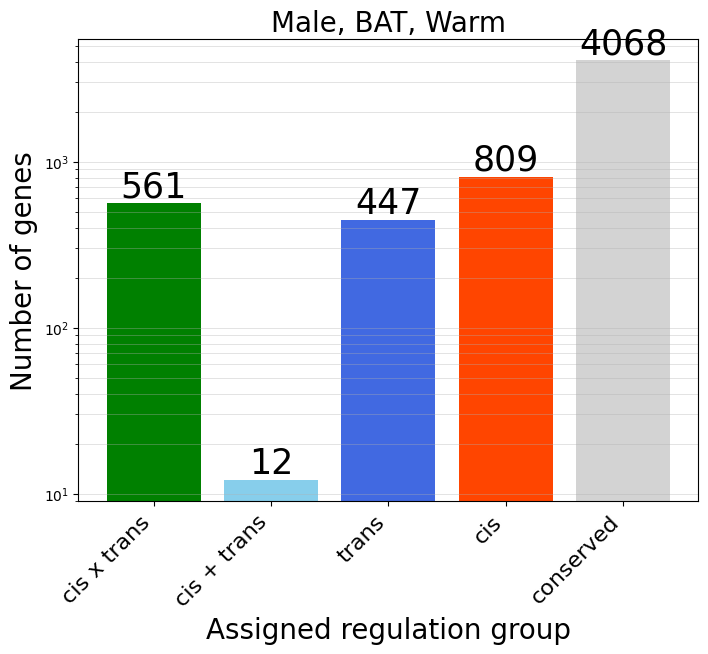

In [15]:
# histogram of pvalues and FDRs
fdr_no_cis_bat_warm, fdr_no_trans_bat_warm = get_fdrs(pvals_no_cis_bat_warm,
                                                      pvals_no_trans_bat_warm,
                                                      title=title_bat_warm,visualize = True)

# histogram and scatter plots of learned weights
plot_weight_distributions(coefficients_bat_warm,
                              title=title_bat_warm,
                              color = 'tomato',
                              bins=100)

r2_bat_warm = get_r2(actual_values=actual_values_bat_warm,
                     fitted_values=fitted_values_bat_warm,
                     title=title_bat_warm,
                     color='tomato')


df_bat_warm = make_triplot_horizontal(coefficients=coefficients_bat_warm,
                 fdr_no_cis=fdr_no_cis_bat_warm,
                 fdr_no_trans=fdr_no_trans_bat_warm,
                 genes=genes_bat_warm,
                 title=title_bat_warm)

# number per category
plot_reg_bar(reg_assignments=df_bat_warm['reg_assignment'].values,
             title=title_bat_warm)

/tmp/ipykernel_1749398/1538656402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_1749398/1538656402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_1749398/1538656402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

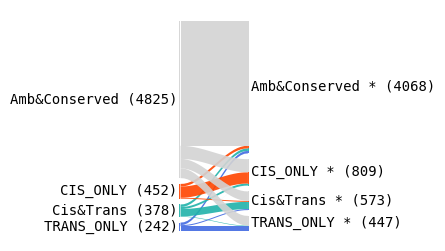

In [16]:
# alluvial plot
assigned_bat_warm['Reg_to_compare']=assigned_bat_warm['Amb&Conserved'].values
df_bat_warm['Reg_to_compare'] = df_bat_warm['reg_assignment'].values
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_bat_warm,df2=df_bat_warm,
               title="",
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False,
              s1 = 1, 
              s2 = 3);

In [17]:
same = sum(assigned_bat_warm.Reg_to_compare.values==df_bat_warm.Reg_to_compare.values) / len(assigned_bat_warm.Reg_to_compare.values)
1- same, same

(0.23096489740546045, 0.7690351025945396)

# Male, Liver, Cold results

In [14]:
results_path = '../results/ballinger/male_Liver_cold_'
title_liver_cold = 'Male, Liver, Cold'



pvals_no_cis_liver_cold = pd.read_csv(f'{results_path}edgeR_pvals_no_cis.csv').iloc[:,0].values
pvals_no_trans_liver_cold = pd.read_csv(f'{results_path}edgeR_pvals_no_trans.csv').iloc[:,0].values
fitted_values_liver_cold = pd.read_csv(f'{results_path}edgeR_fitted_vals.csv')
coefficients_liver_cold = pd.read_csv(f'{results_path}edgeR_coefficients.csv')

actual_values_liver_cold = pd.read_csv('../data/ballinger/male_Liver_cold_X.txt',delimiter='\t',header=None).T

# assigned categories 
assigned_liver_cold = pd.read_csv('../data/ballinger/Liver.MALE.COLD.categories.forplot.txt',sep=' ')
assigned_liver_cold = assigned_liver_cold.set_index( 'Unnamed: 0' )
genes_liver_cold = np.sort(assigned_liver_cold.index.values)
assigned_liver_cold = assigned_liver_cold.loc[ genes_liver_cold, :]

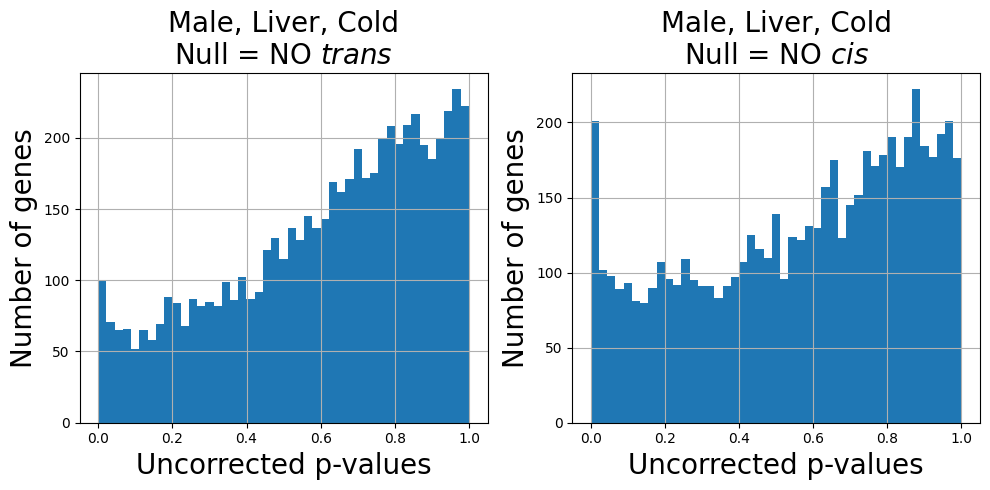

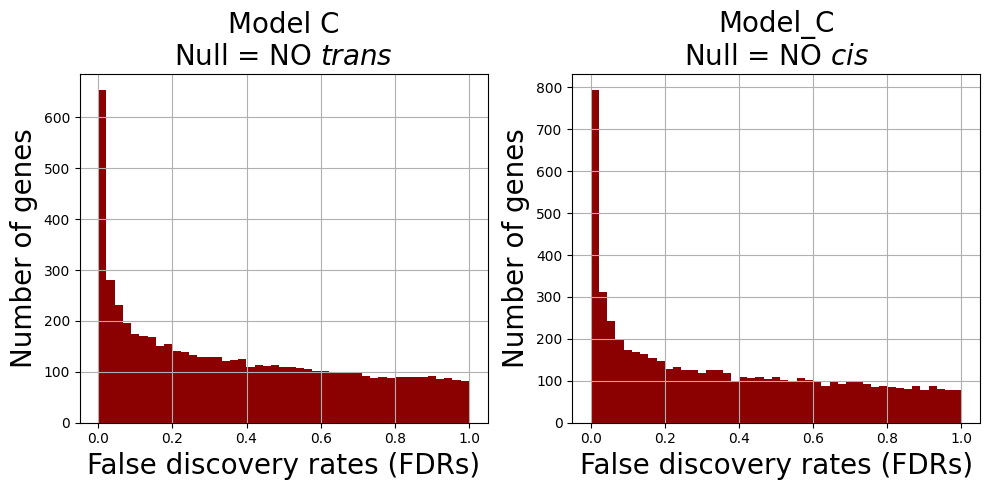

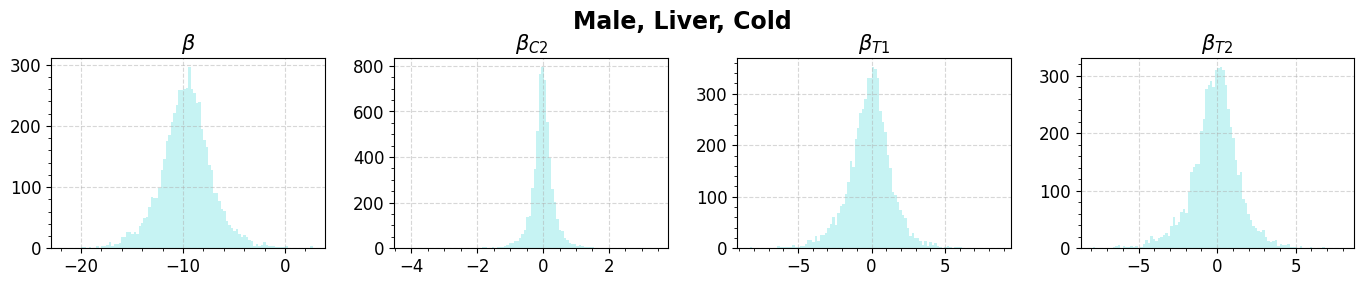

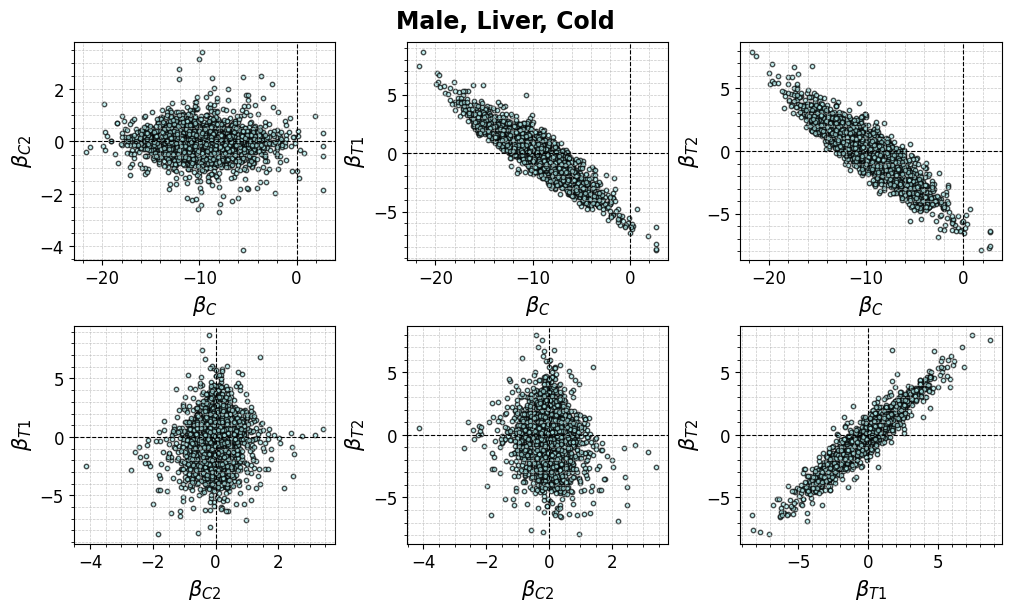

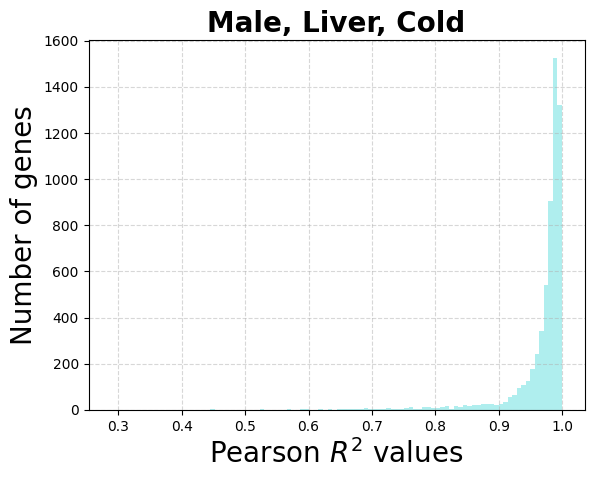

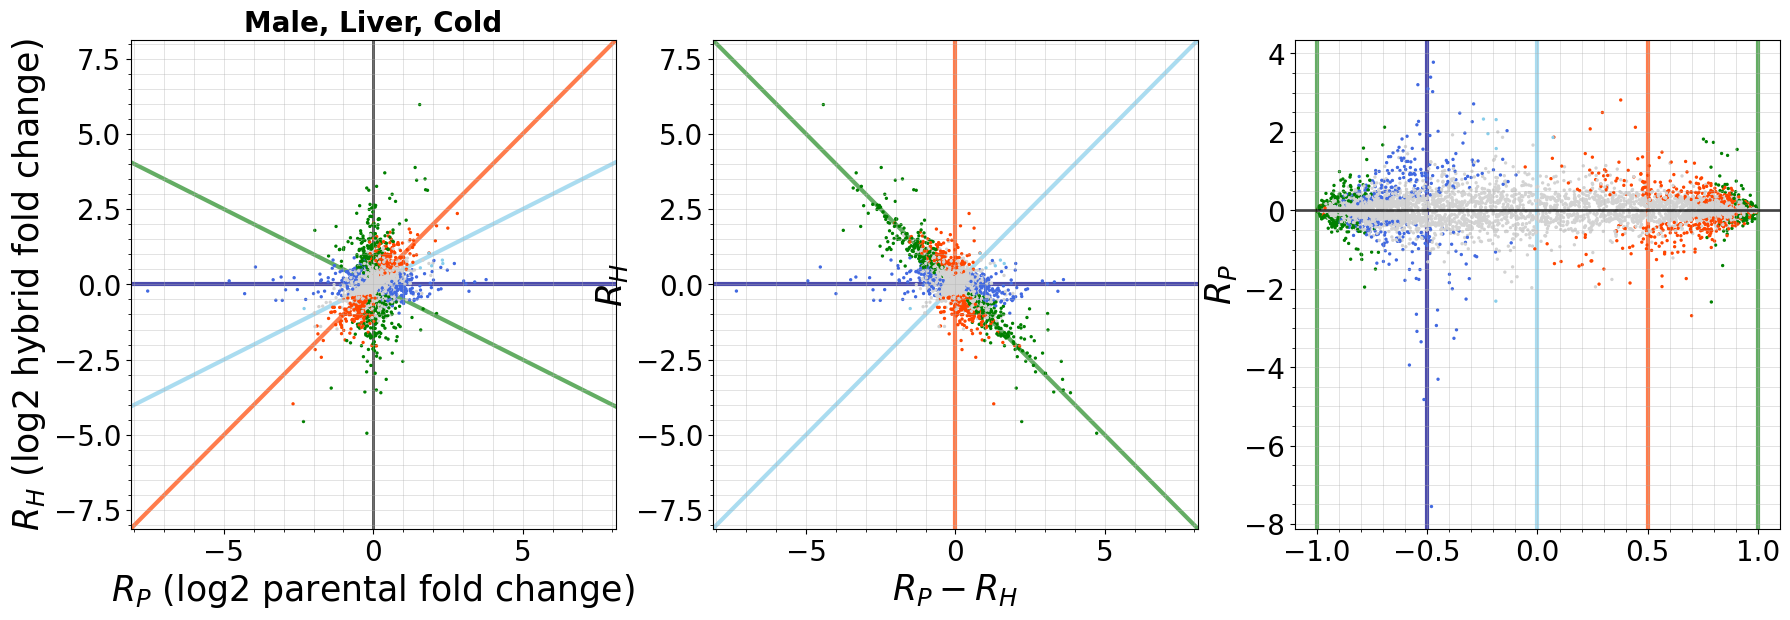

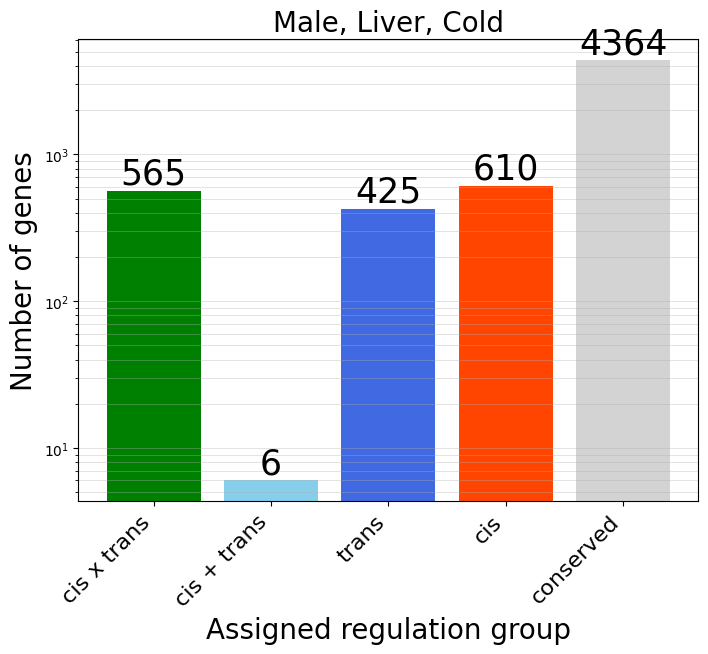

In [19]:
# histogram of pvalues and FDRs
fdr_no_cis_liver_cold, fdr_no_trans_liver_cold = get_fdrs(pvals_no_cis_liver_cold,
                                                      pvals_no_trans_liver_cold,
                                                      title=title_liver_cold,visualize = True)

# histogram and scatter plots of learned weights
plot_weight_distributions(coefficients_liver_cold,
                              title=title_liver_cold,
                              color = 'paleturquoise',
                              bins=100)

r2_liver_cold = get_r2(actual_values=actual_values_liver_cold,
                     fitted_values=fitted_values_liver_cold,
                     title=title_liver_cold,
                     color='paleturquoise')


df_liver_cold = make_triplot_horizontal(coefficients=coefficients_liver_cold,
                 fdr_no_cis=fdr_no_cis_liver_cold,
                 fdr_no_trans=fdr_no_trans_liver_cold,
                 genes=genes_liver_cold,
                 title=title_liver_cold)

plot_reg_bar(reg_assignments=df_liver_cold['reg_assignment'].values,
             title=title_liver_cold)

/tmp/ipykernel_1749398/2612625338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_1749398/2612625338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_1749398/2612625338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

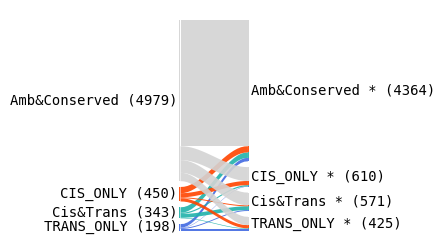

In [20]:
# alluvial plot
assigned_liver_cold['Reg_to_compare']=assigned_liver_cold['Amb&Conserved'].values
df_liver_cold['Reg_to_compare'] = df_liver_cold['reg_assignment'].values
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_liver_cold,df2=df_liver_cold,
              title="",
              s1=1,
              s2=3,
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

In [21]:
same = sum(assigned_liver_cold.Reg_to_compare.values==df_liver_cold.Reg_to_compare.values) / len(assigned_liver_cold.Reg_to_compare.values)
1- same, same

(0.297822445561139, 0.702177554438861)

# Male, Liver, Warm results

In [15]:
results_path = '../results/ballinger/male_Liver_warm_'
title_liver_warm = 'Male, Liver, Warm'


pval_name = "pvals"
pvals_no_cis_liver_warm = pd.read_csv(f'{results_path}edgeR_{pval_name}_no_cis.csv').iloc[:,0].values
pvals_no_trans_liver_warm = pd.read_csv(f'{results_path}edgeR_{pval_name}_no_trans.csv').iloc[:,0].values
fitted_values_liver_warm = pd.read_csv(f'{results_path}edgeR_fitted_vals.csv')
coefficients_liver_warm = pd.read_csv(f'{results_path}edgeR_coefficients.csv')

actual_values_liver_warm = pd.read_csv('../data/ballinger/male_Liver_warm_X.txt',delimiter='\t',header=None).T

# assigned categories 
assigned_liver_warm = pd.read_csv('../data/ballinger/Liver.MALE.WARM.categories.forplot.txt',sep=' ')
assigned_liver_warm = assigned_liver_warm.set_index( 'Unnamed: 0' )
genes_liver_warm = np.sort(assigned_liver_warm.index.values)
assigned_liver_warm = assigned_liver_warm.loc[ genes_liver_warm, :]


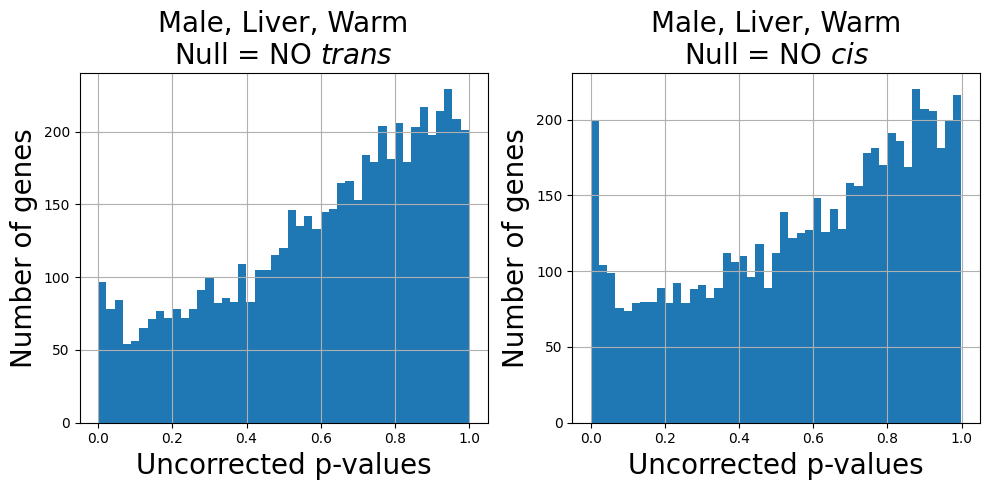

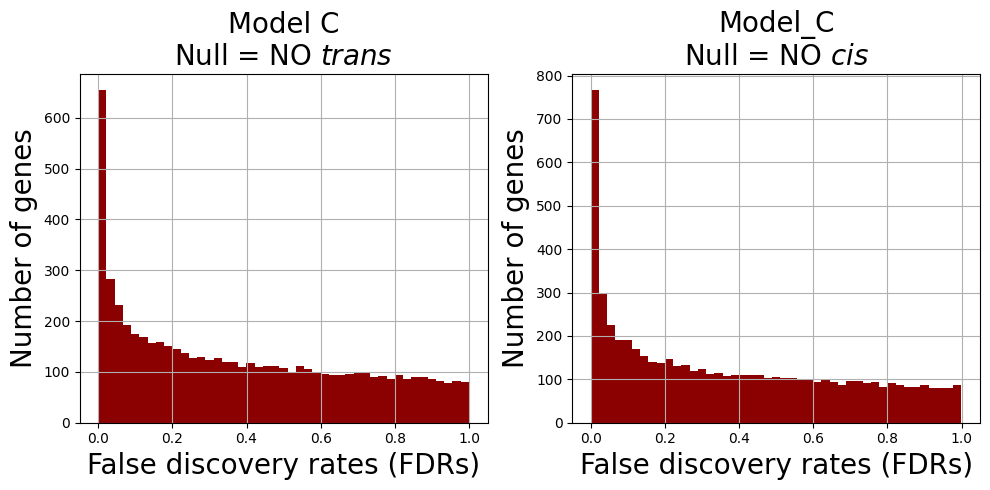

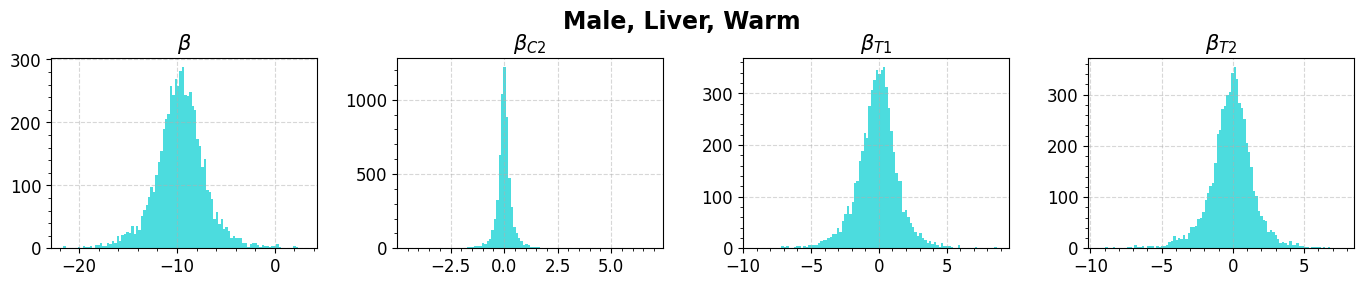

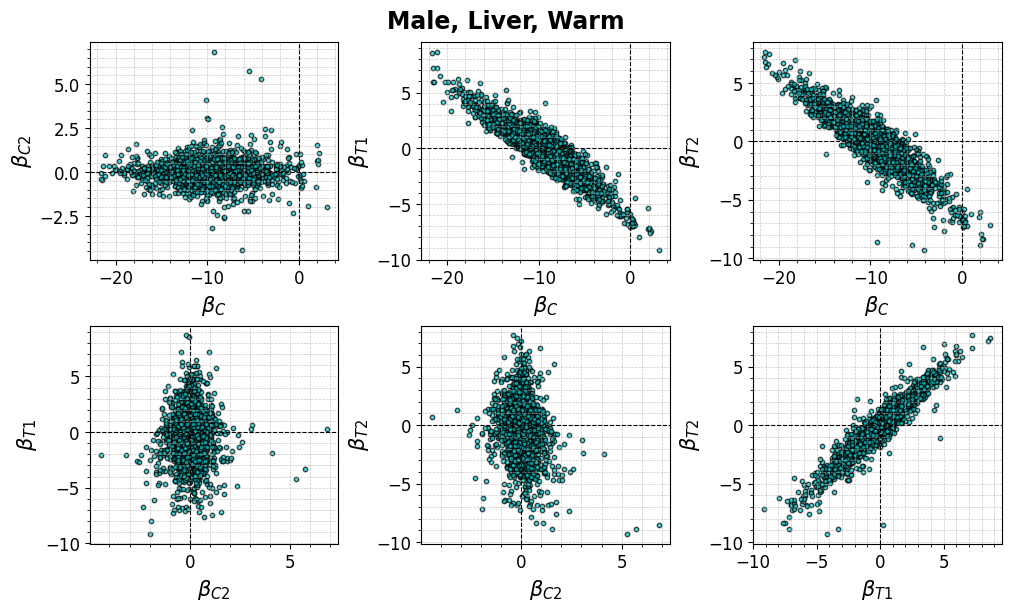

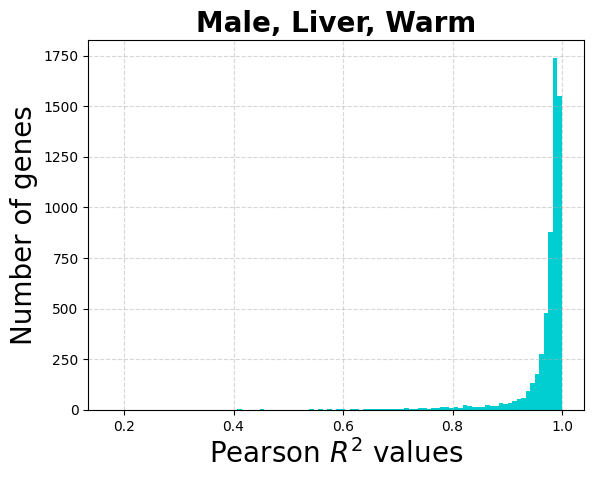

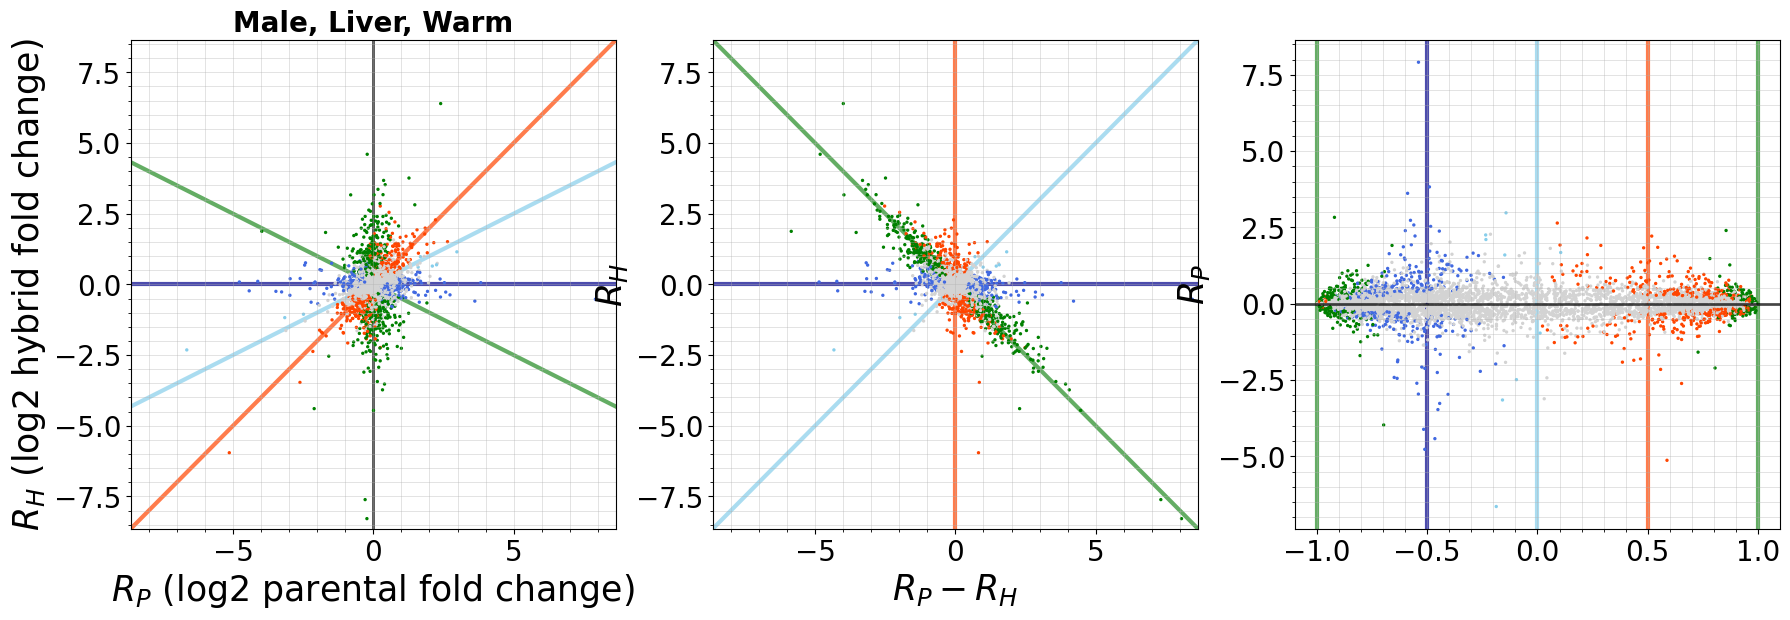

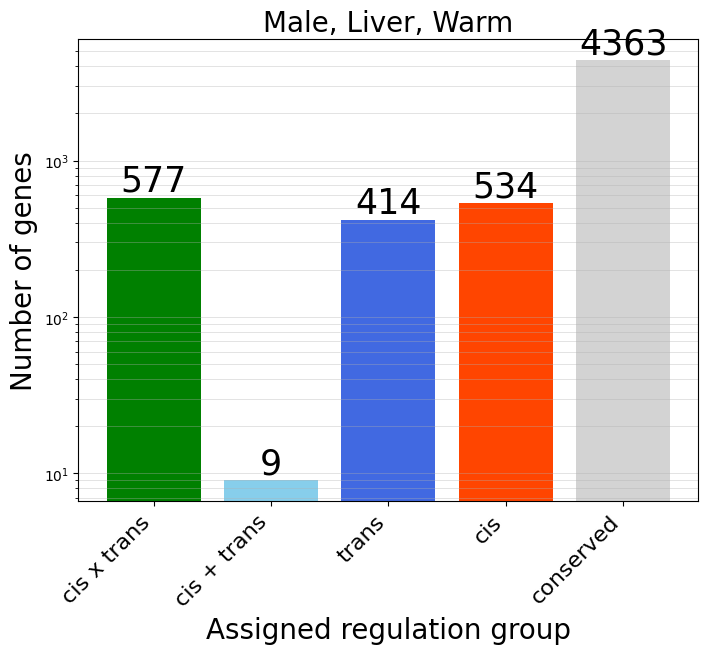

In [23]:
# histogram of pvalues and FDRs
fdr_no_cis_liver_warm, fdr_no_trans_liver_warm = get_fdrs(pvals_no_cis_liver_warm,
                                                      pvals_no_trans_liver_warm,
                                                      title=title_liver_warm,visualize = True)

# histogram and scatter plots of learned weights
plot_weight_distributions(coefficients_liver_warm,
                              title=title_liver_warm,
                              color = 'darkturquoise',
                              bins=100)

r2_bat_warm = get_r2(actual_values=actual_values_liver_warm,
                     fitted_values=fitted_values_liver_warm,
                     title=title_liver_warm,
                     color='darkturquoise')


df_liver_warm = make_triplot_horizontal(coefficients=coefficients_liver_warm,
                 fdr_no_cis=fdr_no_cis_liver_warm,
                 fdr_no_trans=fdr_no_trans_liver_warm,
                 genes=genes_liver_warm,
                 title=title_liver_warm)

# number per category
plot_reg_bar(reg_assignments=df_liver_warm['reg_assignment'].values,
             title=title_liver_warm)

/tmp/ipykernel_1749398/1581722039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_1749398/1581722039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_1749398/1581722039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

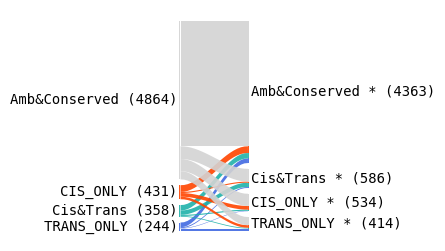

In [24]:
# alluvial plot
assigned_liver_warm['Reg_to_compare']=assigned_liver_warm['Amb&Conserved'].values
df_liver_warm['Reg_to_compare'] = df_liver_warm['reg_assignment'].values
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_liver_warm,df2=df_liver_warm,
               title="",
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False,
              s1=1,
              s2=3);

In [25]:
same = sum(assigned_liver_warm.Reg_to_compare.values==df_liver_warm.Reg_to_compare.values) / len(assigned_liver_warm.Reg_to_compare.values)
1- same, same

(0.2950652874342886, 0.7049347125657114)

# How do the new assignments look against each other

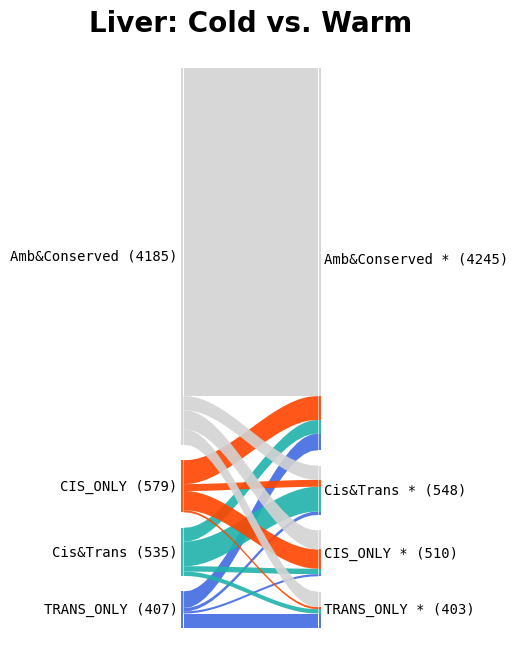

In [26]:
# Liver: cold vs warm
plot_alluvian2(df1=df_liver_cold,df2=df_liver_warm,
              title='Liver: Cold vs. Warm',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

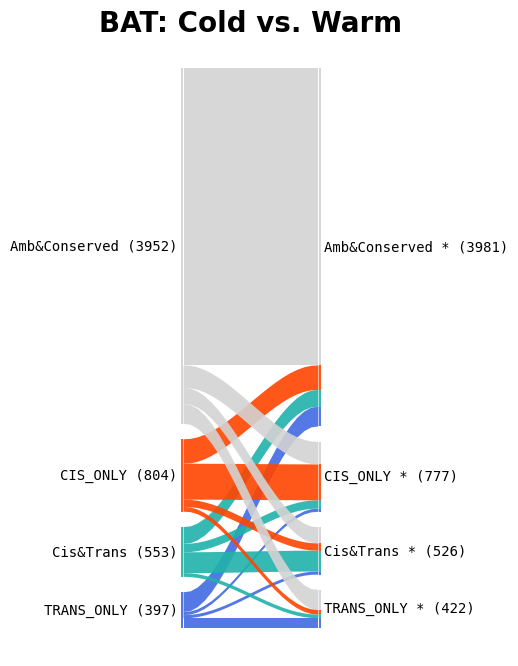

In [30]:
# BAT: cold vs warm
plot_alluvian2(df1=df_bat_cold,df2=df_bat_warm,
              title='BAT: Cold vs. Warm',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

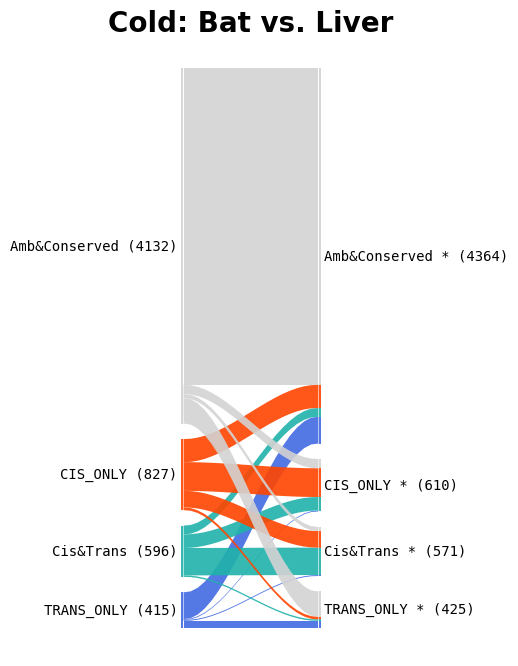

In [31]:
# COLD: bat vs. liver
plot_alluvian2(df1=df_bat_cold,df2=df_liver_cold,
              title='Cold: Bat vs. Liver',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

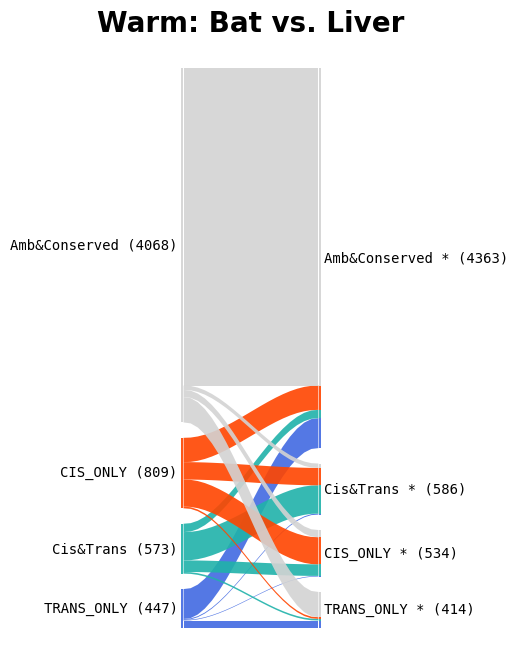

In [ ]:
# Warm: bat vs. liver
plot_alluvian2(df1=df_bat_warm,df2=df_liver_warm,
              title='Warm: Bat vs. Liver',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);